In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.linear_model import LogisticRegression
# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

In [5]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [6]:
#target
Y = data['affair']

In [7]:
model = LogisticRegression()

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [9]:
#train the model
model.fit(X_train, Y_train)

LogisticRegression()

In [10]:
predictions = model.predict_proba(X_test)

In [11]:
#evaluate the score of the train set
model.score(X_train, Y_train)

0.7235188509874326

In [12]:
#evaluate the score of the test, to check if we overtrained or not
model.score(X_test, Y_test)

0.7319371727748691

In [13]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.4:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [14]:
#True Positive Rate = Recall
TPR=tp/(tp + fn) 
TPR

0.528830313014827

In [15]:
#False Positive Rate
FPR=fp/(fp + tn)
FPR

0.19570222563315426

In [16]:
precision = tp / (tp + fp)
precision

0.5572916666666666

In [17]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [18]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [19]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.32338838572189665, 1.0, 0.07582923299352426)
(0.3230277185501066, 0.9983525535420099, 0.07617596143236989)
(0.3232, 0.9983525535420099, 0.07800501873268442)
(0.3233724653148346, 0.9983525535420099, 0.07833731262282266)
(0.32354511478910836, 0.9983525535420099, 0.07858652783689168)
(0.32371794871794873, 0.9983525535420099, 0.07969132497223455)
(0.3238909673971138, 0.9983525535420099, 0.07987106598442875)
(0.3240641711229946, 0.9983525535420099, 0.08031367506984267)
(0.32423756019261635, 0.9983525535420099, 0.08053860512171307)
(0.3238758029978587, 0.9967051070840197, 0.08068797164622141)
(0.32404927691483665, 0.9967051070840197, 0.08099233426718311)
(0.3236870310825295, 0.9950576606260296, 0.08121210595231258)
(0.32386058981233246, 0.9950576606260296, 0.08256997143167502)
(0.3240343347639485, 0.9950576606260296, 0.0829337347811328)
(0.32420826623725174, 0.9950576606260296, 0.08296584565245695)
(0.32438238453276047, 0.9950576606260296, 0.0832780222699883)
(0.3247311827956989, 0.995057

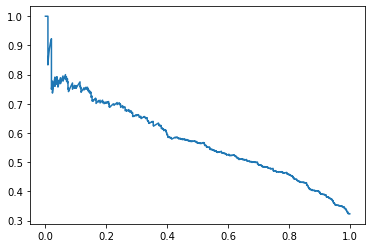

In [20]:
import matplotlib.pyplot as plt
#график Precision - Recall
plt.plot( re,pr )

In [21]:
from sklearn.metrics import average_precision_score

In [22]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5761329928884336

In [23]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [24]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [25]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.9292091231331285)
(0.0, 0.0016474464579901153, 0.9292091231331285)
(0.0, 0.008237232289950576, 0.8999886282168372)
(0.0007674597083653108, 0.008237232289950576, 0.8977304704769404)
(0.0007674597083653108, 0.019769357495881382, 0.8650840094066987)
(0.0030698388334612432, 0.019769357495881382, 0.8547129969151389)
(0.0030698388334612432, 0.023064250411861616, 0.8544826969280866)
(0.003837298541826554, 0.023064250411861616, 0.8521926897692024)
(0.003837298541826554, 0.03130148270181219, 0.8338303463075238)
(0.004604758250191865, 0.03130148270181219, 0.8336073221716206)
(0.004604758250191865, 0.03789126853377265, 0.8248957640920727)
(0.005372217958557176, 0.03789126853377265, 0.8231501855806642)
(0.005372217958557176, 0.04118616144975288, 0.8191949396955107)
(0.0061396776669224865, 0.04118616144975288, 0.8186308248894801)
(0.0061396776669224865, 0.04942339373970346, 0.8087952640794415)
(0.006907137375287797, 0.04942339373970346, 0.8081343481808791)
(0.006907137375287797, 0.0576

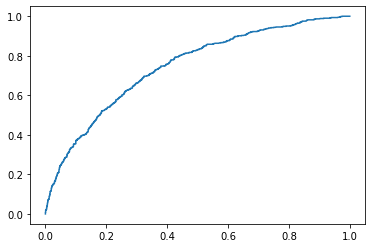

In [26]:
plt.plot( fpr, tpr )

In [27]:
from sklearn.metrics import roc_curve

In [28]:
from sklearn.metrics import roc_auc_score

In [29]:
roc_auc_score( Y_test, predictions[:, 1] )

0.7451629176618145

In [30]:
from sklearn.metrics import auc

In [31]:
auc( fpr, tpr ) #to compare

0.7451629176618145